In [83]:
import numpy as np
import matplotlib.pyplot as plt
from random import choices

# Random Matrix Generator and Print function

The Matrix will be randomly generated using `np.random.rand`.
The matrix can either be fully randomized (`values = None`), or initialized randomly by choosing values from `values[list|tuple]`. 

The function then returns another function `getMat(...)`, which can be called to explicitly set `t_i` to any value.

In [84]:
# Define a matrix generator function that takes in two parameters t1 and t2
# and returns a 5x5 matrix with the values of t1 and t2 at random positions.
def getRandomMatrix(N: int, values: None | list | tuple = None, random_parameters: int = 2, conversions = None):
    if values is None:
        mat = np.random.rand(N,N) + 1j*np.random.rand(N,N)
    else:
        # Choose a random complex matrix with entries in values
        mat = np.random.choice(values, size = (N,N))
    # Possible random indices
    possible_random_indices = [(i,j) for i in range(N) for j in range(N)]
    random_indices = choices(possible_random_indices, k = random_parameters)
    [print(f"Random index {i}: {x},{y}") for i,(x,y) in enumerate(random_indices)]
    def getMat(*args):
        if conversions is not None:
            args = [conversion(current) for conversion,current in zip(conversions,args)]
        for i, arg in enumerate(args):
            mat[*random_indices[i]] = arg
        return mat
    return getMat

# Ugly function to print the matrix.
def printMatrix(mat, parameters: int):
    offset = 1_000_000
    keys = list(range(offset, offset+parameters))
    m = mat(*keys)
    for i in range(len(m)):
        print("| ",end = "")
        for j in range(len(m)):
            top = f"t{keys.pop(0)-offset}" if m[i,j].real >= 1000 else f"{m[i,j]:.2f}"
            print(top, end = " ")
            if j < len(m)-1:
                l = len(top)
                print(" "*(15-l), end = "")
        print("\t |")

# Matrix Configuration

The visualization is cahracterized using only four components:

- `grid` - The minimum and maximum value for `t1` and `t2`.
- `resolution` - The numerical resolution of the grid. The grid is naively calculated using equidistant points
- `N` - The eigenvalues will be calculated for an `NxN` matrix.
- `values` - The matrix will be randomly initialized with `t_i` at random positions. The remaining values are chosen from this list
- `parameters` - The number of random variable parameters in the matrix
- `conversions` - A list of functions to apply to each parameter

In [85]:
## Matrix Configuration ##

# x_min,max and y_min,max
grid: float = 100
# Grid resolution, i.e. the number of points is resultuion^2
resolution: int = 400
# The Matrix Dimensions
N: int = 4
# The values to pick from. If None, a random matrix is generated.
values: None | list | tuple = (0,1,-1,1j,-1j)
# Number of random parameters
parameters: int = 2
# Parameter Conversions
conversions: None | list | tuple = None

# Calculation of the Eigenvalues

First, calculate the grid using `np.linspace(...)`. This will result in equidistant spacing of the gridpoints. We could also use other random distributions, or even iterate the grid to feature more points where the Eigenvalue density becomes high.
Here we could also change the cartesian space to e.g. spherical coordinates.

Then, generate a random matrix using `getRandomMatrix(...)`. Iterate the grid points and calculate the Eigenvalues using `np.linalg.eigvals(...)`.

In [86]:
# Generate Grid
g = [np.linspace(-grid,grid,resolution) for _ in range(parameters)]

# Calculate the eigenvalues for each combination of g's.
matrix = getRandomMatrix(N, values, parameters, conversions)

# Print the Matrix once
printMatrix(matrix, parameters)

# Create list of all possible combinations of entries in g
indices = np.array(np.meshgrid(*[g[i] for i in range(parameters)])).T.reshape(-1,parameters)

# Calculate the eigenvalues for each combination.
eigenvalues = []
for args in indices:
    eigs = np.linalg.eigvals(matrix(*args))
    eigenvalues.extend(eigs)

Random index 0: 27,17
Random index 1: 30,6
| 1.00+0.00j      -0.00-1.00j     -1.00+0.00j     0.00+0.00j      0.00+0.00j      -0.00-1.00j     1.00+0.00j      -1.00+0.00j     0.00+1.00j      1.00+0.00j      1.00+0.00j      0.00+0.00j      0.00+0.00j      -1.00+0.00j     -0.00-1.00j     -0.00-1.00j     0.00+1.00j      0.00+1.00j      0.00+0.00j      -0.00-1.00j     -1.00+0.00j     0.00+0.00j      1.00+0.00j      0.00+0.00j      1.00+0.00j      -0.00-1.00j     -1.00+0.00j     0.00+0.00j      -1.00+0.00j     -0.00-1.00j     -0.00-1.00j     -0.00-1.00j     -1.00+0.00j     0.00+0.00j      0.00+0.00j      1.00+0.00j      -0.00-1.00j     0.00+1.00j      0.00+1.00j      -0.00-1.00j 	 |
| 0.00+1.00j      0.00+0.00j      0.00+0.00j      0.00+0.00j      1.00+0.00j      -0.00-1.00j     -1.00+0.00j     0.00+0.00j      -1.00+0.00j     -0.00-1.00j     0.00+1.00j      0.00+0.00j      1.00+0.00j      0.00+0.00j      -0.00-1.00j     0.00+1.00j      -1.00+0.00j     0.00+1.00j      -0.00-1.00j     0.00+1.00

# Plot

Then plot the Eigenvalues using different styles. In this case, we plot the Eigenvalues using:
- Scatter
- Scatter with smaller points
- Scatter with viridis coloring
- Scatter with twilight coloring

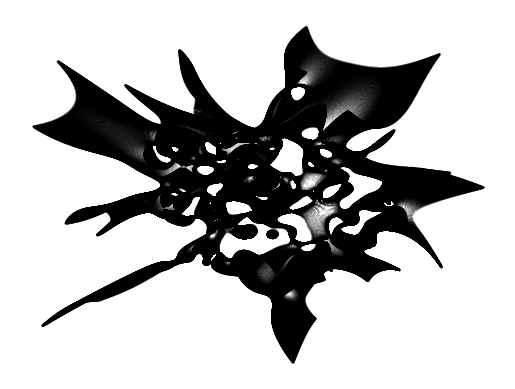

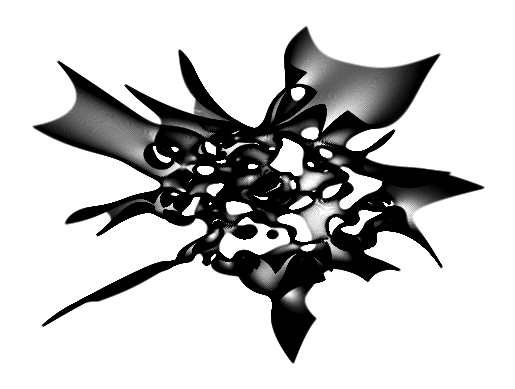

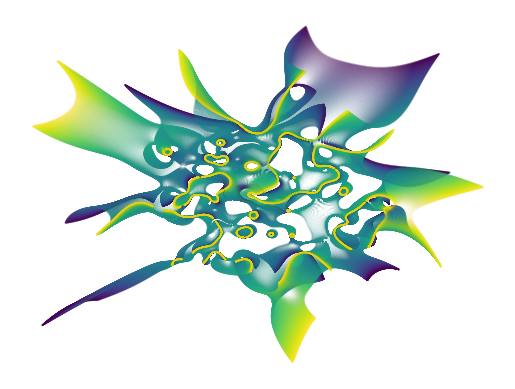

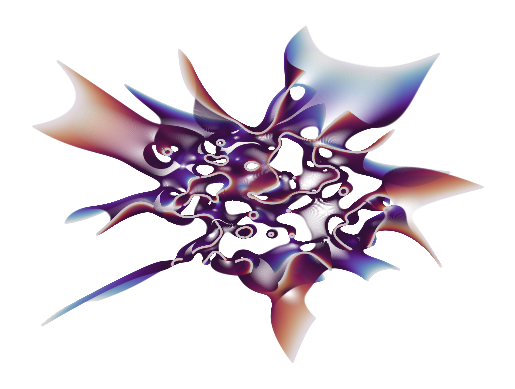

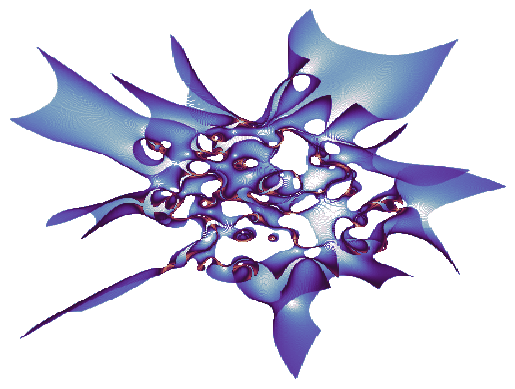

In [87]:
abs_values = np.abs(eigenvalues)
c1 = plt.cm.viridis(np.linspace(0,1,len(eigenvalues)))
c2 = plt.cm.twilight(np.linspace(0,1,len(eigenvalues)))

# Plot the eigenvalues on a scatter plot using different styles.
for s,c,alpha in ( (0.1, "black", 0.2), (0.01, "black", 0.2), (0.01, c1, 0.2), (0.01, c2, 0.2) ):
    plt.scatter(np.real(eigenvalues), np.imag(eigenvalues), s = s, c = c, alpha = alpha)
    # Remove Axes and Ticks
    plt.axis("off")
    plt.show()

from matplotlib.colors import LogNorm
plt.hist2d(np.real(eigenvalues), np.imag(eigenvalues), bins = resolution, cmap = "twilight", norm=LogNorm())
plt.axis("off")
plt.show()

# Do 3D Plot
if parameters == 3:
    from mpl_toolkits.mplot3d import Axes3D
    fig = plt.figure(figsize=(15, 15))
    ax = fig.add_subplot(111, projection='3d')
    z = np.repeat(g[-1],len(eigenvalues)/len(g[-1]))
    ax.scatter(np.real(eigenvalues), np.imag(eigenvalues), z, c = c2, alpha = 0.2)
    plt.axis("off")